In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

Load wav

In [ ]:
music, sr = librosa.load("/content/drive/My Drive/5001/genres_original/pop/pop.00000.wav")
ipd.Audio(music, rate=sr)

Wave (波形图)

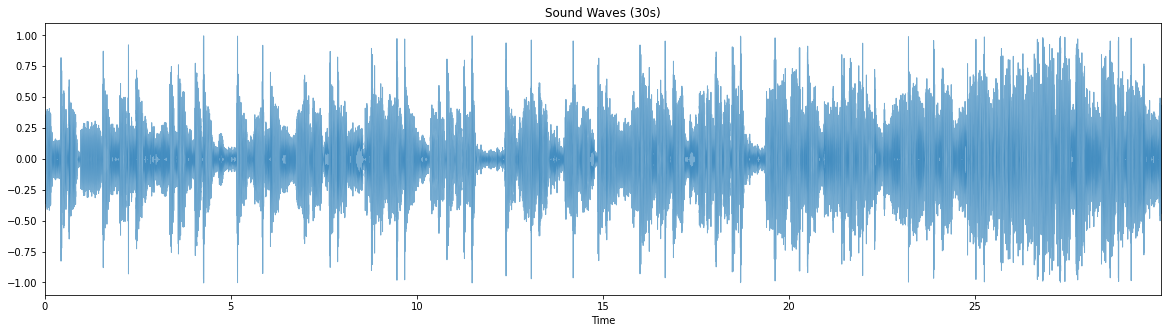

In [ ]:
#0~30s
plt.figure(figsize=(20, 5))
librosa.display.waveplot(music, sr=sr, alpha=0.6)
plt.title("Sound Waves (30s)")
plt.show()

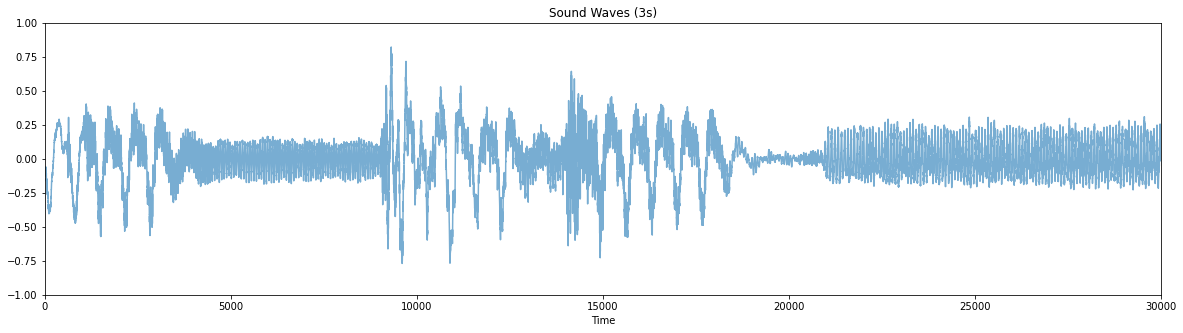

In [ ]:
#0~3s
music3 = np.array([mic for mic in music])
plt.figure(figsize=(20, 5))
plt.axis([0, 30000, -1, 1])
plt.plot(music3[0:30000], alpha=0.6)
plt.xlabel('Time')
plt.title("Sound Waves (3s)")
plt.show()

Spectrum (频谱图)

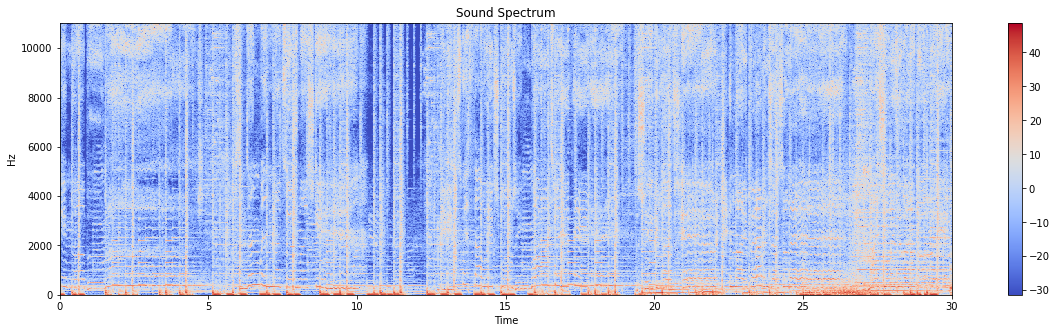

In [ ]:
X = librosa.stft(music)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Sound Spectrum")
plt.show()

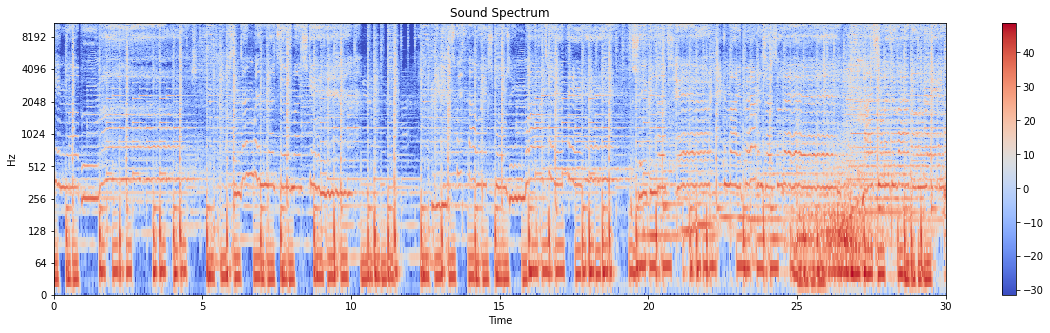

In [ ]:
#频率取对数
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Sound Spectrum")
plt.show()

Mel Spectrogram

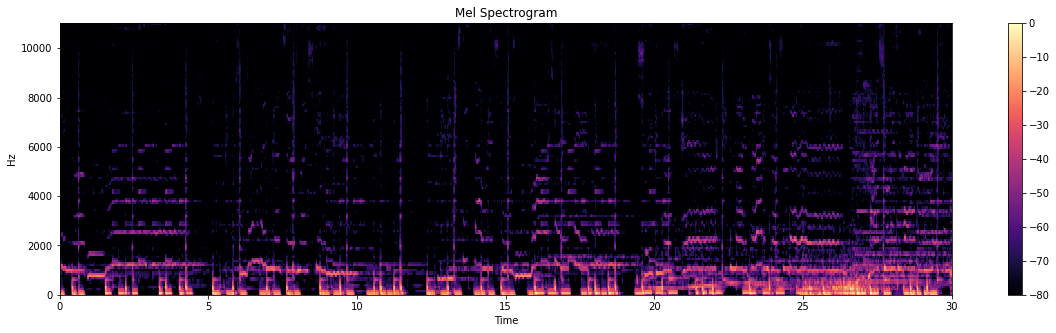

In [ ]:
# 存储的图片
y, _ = librosa.effects.trim(music)
hop_length = 512
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (20, 5))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'hz')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

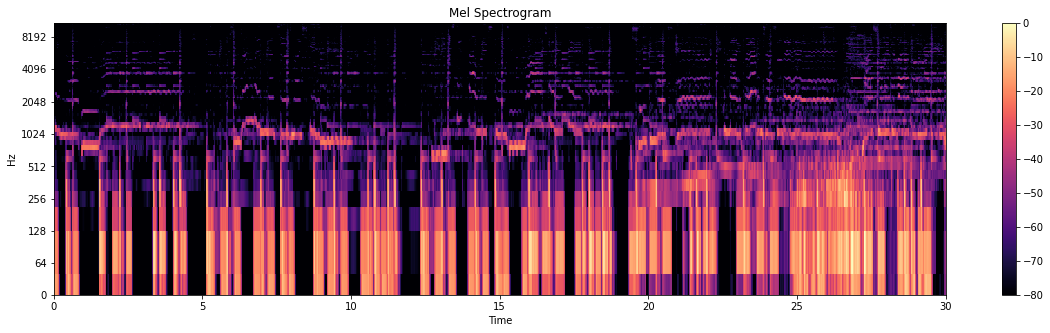

In [ ]:
#频率取对数
plt.figure(figsize=(20, 5))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

光谱质心、光谱衰减

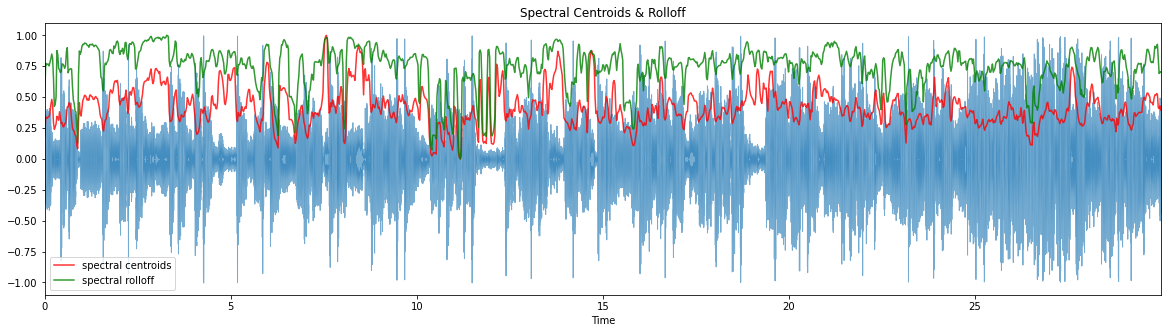

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(music, sr=sr)[0]
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(20, 5))
librosa.display.waveplot(music, sr=sr, alpha=0.6)
# spectral centroids
plt.plot(t, normalize(spectral_centroids), color='r', alpha=0.8, label='spectral centroids')
# spectral rolloff
plt.plot(t, normalize(spectral_rolloff), color='g', alpha=0.8, label='spectral rolloff')
plt.legend()
plt.title("Spectral Centroids & Rolloff")
plt.show()

色度频率


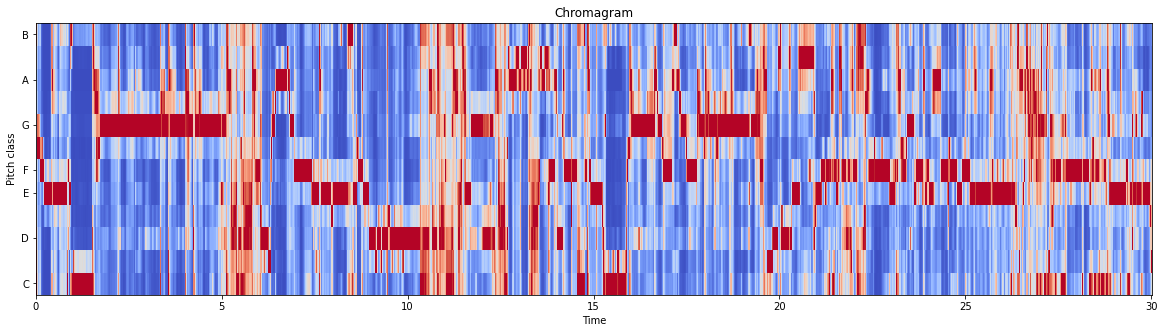

In [ ]:
chromagram = librosa.feature.chroma_stft(music, sr=sr, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.title("Chromagram")
plt.show()